In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


**Reading the DataSet**

In [2]:
train= pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**EXPLORATORY DATA ANALYSIS**

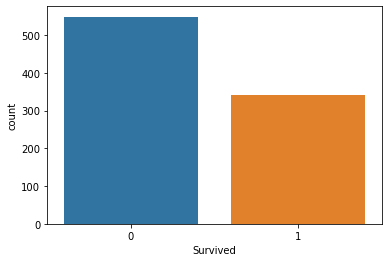

In [6]:
sns.countplot(train['Survived'])

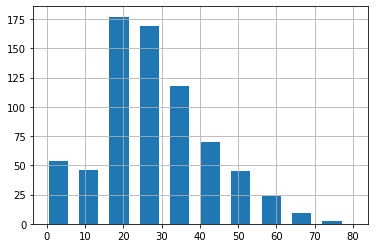

In [7]:
train['Age'].hist(width=5)

([<matplotlib.patches.Wedge at 0x7ff31004d290>,
 [Text(0.911772230064993, 0.6153628201982223, 'Cherbourg'),
  Text(0.12219517070335402, 1.0931918131127667, 'Queenstown'),
  Text(-0.712839742990267, -0.8377705537995295, 'South Hampton')])

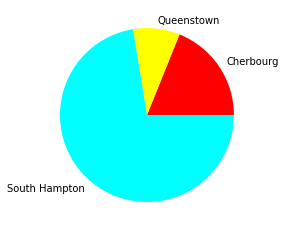

In [8]:
col=["red","yellow","aqua"]
lbl = "Cherbourg","Queenstown","South Hampton"
sizes = [sum(train['Embarked']=='C'),sum(train['Embarked']=='Q'),sum(train['Embarked']=='S')]
plt.pie(sizes,labels=lbl,colors=col)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


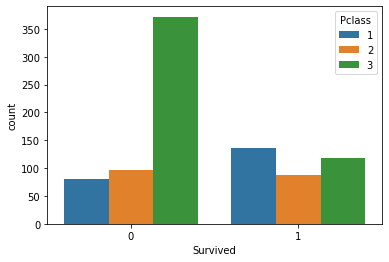

In [9]:
sns.countplot(train['Survived'],hue=train['Pclass'])
train[['Pclass','Survived']].groupby('Pclass').mean()

#Seeing the relation of Passenger Class on Survival
#People who bought First Class Ticket are more likely to survive

,Survived
Sex,
female,0.742038
male,0.188908


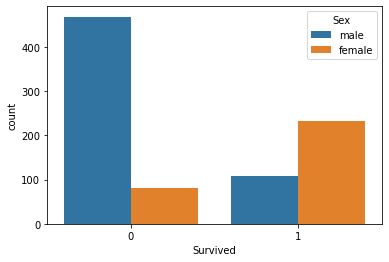

In [10]:
sns.countplot(train['Survived'],hue=train['Sex'])
train[['Sex','Survived']].groupby('Sex').mean()

#Females were more likeley to survive

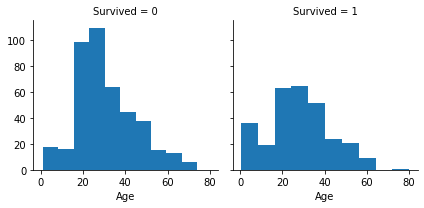

In [11]:
g = sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age')

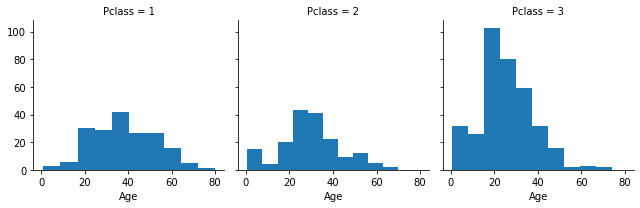

In [12]:
g=sns.FacetGrid(train,col='Pclass')
g.map(plt.hist,"Age")

**Correlation of all the Features with each other**

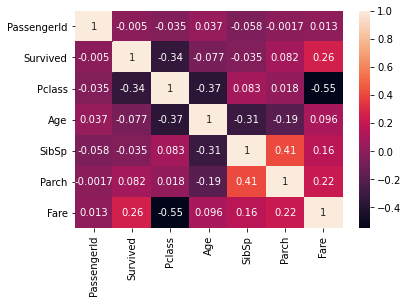

In [13]:
sns.heatmap(train.corr(),annot=True)

**FEATURE ENGINEERING (Dropping the Missing Values and derriving important features from the existing one's**

In [68]:
train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
B              0
C              0
D              0
E              0
F              0
G              0
T              0
U              0
Q              0
S              0
Title          0
Family_Size    0
dtype: int64

In [15]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
#Since Embarked has only Two Missing Values. I will fill it by S ie Majority
train["Embarked"]=train["Embarked"].fillna("S")
test["Embarked"]=test["Embarked"].fillna("S")

**Cabins location can be an important factor when it comes to Rescuing those onboard. Therefore Missing Values are being assigned Unknown 'U' becuase we cannot assign it randomly **

In [17]:
train["Cabin"]=train["Cabin"].fillna("U")
test["Cabin"]=test["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [18]:
cab = pd.get_dummies(train["Cabin"],drop_first = True)
train = pd.concat([train,cab],axis=1)

In [19]:
cab = pd.get_dummies(test["Cabin"],drop_first = True)
test = pd.concat([test,cab],axis=1)

In [20]:
final_emb = pd.get_dummies(test["Embarked"],drop_first = True)
test = pd.concat([test,final_emb],axis=1)
final_emb = pd.get_dummies(train["Embarked"],drop_first = True)
train = pd.concat([train,final_emb],axis=1)

In [21]:
test["Fare"] = test["Fare"].fillna(np.mean(test["Fare"]))

In [22]:
#Dividing each Pclass category based no. of SibSp and their respective Age Median
#So as to fill missing age values as it has max correlation with Pclass and SibSp
train_set_1_median = train[['Pclass','SibSp','Age']].groupby(['Pclass','SibSp']).median()
test_set_1_median = train[['Pclass','SibSp','Age']].groupby(['Pclass','SibSp']).median()

In [23]:
test_set_1_median

Age
Pclass SibSp      
1      0      37.0
       1      38.0
       2      44.0
       3      23.0
2      0      30.0
       1      29.0
       2      23.5
       3      30.0
3      0      26.0
       1      25.0
       2      19.5
       3       6.0
       4       6.5
       5      11.0
       8       NaN

In [24]:
def fillage(dataset,dataset_median):
    for x in range (len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_median.iloc[0,:]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_median.iloc[1,:]["Age"]
            elif dataset["SibSp"][x]==2:
                  return dataset.set_median.iloc[2,:]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_median.iloc[3,:]["Age"]
        if dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_median.iloc[4,:]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_median.iloc[5,:]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_median.iloc[6,:]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_median.iloc[7,:]["Age"]    
        if dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_median.iloc[8,:]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_median.iloc[9,:]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_median.iloc[10,:]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_median.iloc[11,:]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_median.iloc[12,:]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_median.iloc[13,:]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_median.iloc[8:13,:].median()
                    
                

In [25]:
train['Age']=train['Age'].fillna(fillage(train,train_set_1_median))
test['Age']=test['Age'].fillna(fillage(test,test_set_1_median))

**All the Missing Values have been Adequately Filled**

In [28]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
B              0
C              0
D              0
E              0
F              0
G              0
T              0
U              0
Q              0
S              0
dtype: int64

**Extracting the title out of the Name. So that it can be included in our DataSet for an in - deapth Analysis**

In [29]:

train['Title'] = train['Name'].map(lambda x:x.split(".")[0].split(",")[1].strip())
test['Title'] = test['Name'].map(lambda x:x.split(".")[0].split(",")[1].strip())

**Encoding the Title and Sex Feature. So that we can convert them from Categorical to Numeric**

In [30]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [31]:
tits_map = {"Mr":1,"Mrs":2,"Miss":3,"Master":4,"Don":5,"Rev":5,"Dr":6,"Mme":2,"Ms":3,"Major":6,"Lady":2,"Sir":1,"Mlle":3,"Col":6,"Capt":6,"the Countess":5,"Jonkheer":5,"Dona":5 }

In [32]:
train['Title']=train['Title'].map(tits_map)
test['Title']=test['Title'].map(tits_map)

In [33]:
sex_map={"male":0,"female":1}

In [34]:
train['Sex']=train['Sex'].map(sex_map)
test['Sex']=test['Sex'].map(sex_map)

In [35]:
train['Family_Size']=train['SibSp']+train['Parch']+1
test['Family_Size']=test['SibSp']+test['Parch']+1

**Dropping out the Old Categorical Features**

In [37]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [42]:
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

**Dividing into Training and Test DataSet**

In [49]:
X_train = train.iloc[:,1:17]
X_test = train.iloc[:,1:17]
y_train = train.iloc[:,0]
y_test = train.iloc[:,0]

**Reshaping the Test Dataset so it gets converted into 2-D Array which is a required Parameter for Confusion Matrix and Accuracy Calculation**

In [50]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

* **Making the Model based on Logistic Regression and KNearestNeighbors.**
* **Evaluating the Model using Confusion Matrix and Accuracy Score**
    

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [65]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
cm = confusion_matrix(clf.predict(X_test),y_test)
print('\n Confusion Matrix\n',cm)
print('\n Accuracy: \n',accuracy_score(y_test,clf.predict(X_test)))


 Confusion Matrix
 [[470  95]
 [ 79 247]]

 Accuracy: 
 0.8047138047138047


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
cm = confusion_matrix(clf.predict(X_test),y_test)
print('\n Confusion Matrix\n',cm)
print('\n Accuracy: \n',accuracy_score(y_test,clf.predict(X_test)))



 Confusion Matrix
 [[479 106]
 [ 70 236]]

 Accuracy: 
 0.8024691358024691


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
